In [2]:
import csv
import nltk

# Initialize variables: The original dataset contains one token per line.
# For tagging, we need to process it sentence by sentence
original_dataset = []
dataset_for_tagging =[]

# Path to the CoNLL file and to the new output
#### Make sure to do this with both: the training and the test file!!! ###

# path_conll = "/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_test_cap.txt"

# path_conll_nltk_tags ='/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_test_cap_nltktags.txt'

path_conll = "/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_train_cap.txt"

path_conll_nltk_tags ='/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_train_cap_nltktags.txt'

with (open(path_conll)) as f:
    csv_file = csv.reader(f, delimiter='\t', quotechar=None)

    # For each sentence, we want to store the following information:
    # words, pos-tags (from the MBT Tagger), ne-labels
    words, mbt_tags, labels = [], [], []

    for idx, row in enumerate(csv_file):
        # Keep all lines unchanged here
        original_dataset.append(row)

        # Empty rows indicate sentence boundaries. We add the collected information to the dataset
        if len(row) == 0:

            # Make sure that everything has the same length
            assert len(words) == len(mbt_tags) == len(labels)

            # Add the information for the current sentence to the dataset
            # Each sentence is a tuple of words, tags, and labels
            dataset_for_tagging.append((words, mbt_tags, labels))

            # Re-initialize the variables
            words, mbt_tags, labels = [], [], []

        else:
            word, previous, casing, pos, chunk, label = row
            word = str(row[0])
            mbt_tag = str(row[3])
            label = str(row[5])

            words.append(word)
            mbt_tags.append(pos)
            labels.append(label)

# The last empty line is not processed by the reader, so we need to add the last sentence here.
if not len(words) == 0:
    dataset_for_tagging.append((words, mbt_tags, labels))

##### Your work starts HERE ####

# Initialize some counting variables

differnet_pos = 0
total = 0
different_label=0

differentlist=[]
wordslist = []
all_nltk_tags =[]
influence =[]

for sentence in dataset_for_tagging:
    # Split the tuple into the different categories
    words, mbt_tags, labels = sentence

    # Get the new POS-tags
    # The POS-tagger outputs a list of tuples [(word, POS-tag),...]
    nltk_output = nltk.pos_tag(words)
    # We only want to extract the tags
    nltk_tags = [tag for word, tag in nltk_output]
    all_nltk_tags.append(nltk_tags)

    # Now do your analysis on the words and the tags
    # Make sure to ignore the word "-DOCSTART-" because it just indicates document boundaries
    for i in range(len(mbt_tags)):
        if mbt_tags[i] == '-X-':
            continue
        else:
            total+=1
            if mbt_tags[i] != nltk_tags[i]:
                differentlist.append((mbt_tags[i],nltk_tags[i]))
                wordslist.append(words[i])
                differnet_pos +=1
                if labels[i]!='O':
                    different_label+=1
                    influence.append((mbt_tags[i],nltk_tags[i]))
                    
            
    




#### Output your results here: ####

print('total,error,percentage',total, differnet_pos,round(differnet_pos/total,4))
print('How many different label if there is',different_label)

# Now, let's output the CoNLL data with the output for the POS column replaced with the nltk tags
with (open(path_conll_nltk_tags, "w")) as outfile:
    # Initialize ids
    sentence_id = 0
    word_id = 0

    for row in original_dataset:
        # Add a new line after each sentence
        if len(row) == 0:
            outfile.write("\n")

            # update variables
            sentence_id += 1
            word_id = 0

        else:
            # Do not change the tag for document boundaries
            if word == "-DOCSTART-":
                outfile.write("\t".join(row))
                outfile.write("\n")

            # Replace the tag for all other tokens
            else:
                new_row = [x for x in row]

                nltk_tag = all_nltk_tags[sentence_id][word_id]
                new_row[3] = nltk_tag

                outfile.write("\t".join(new_row))
                outfile.write("\n")

            word_id += 1





total,error,percentage 203621 19465 0.0956
How many different label if there is 4648


In [ ]:
print('total,error,percentage',total, differnet_pos,round(differnet_pos/total,4))
print('How many different label if there is',different_label)

In [3]:
dataset_for_tagging

[(['-DOCSTART-'], ['-X-'], ['O']),
 (['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'],
  ['NNP', 'VBZ', 'JJ', 'NN', 'TO', 'VB', 'JJ', 'NN', '.'],
  ['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']),
 (['Peter', 'Blackburn'], ['NNP', 'NNP'], ['B-PER', 'I-PER']),
 (['BRUSSELS', '1996-08-22'], ['NNP', 'CD'], ['B-LOC', 'O']),
 (['The',
   'European',
   'Commission',
   'said',
   'on',
   'Thursday',
   'it',
   'disagreed',
   'with',
   'German',
   'advice',
   'to',
   'consumers',
   'to',
   'shun',
   'British',
   'lamb',
   'until',
   'scientists',
   'determine',
   'whether',
   'mad',
   'cow',
   'disease',
   'can',
   'be',
   'transmitted',
   'to',
   'sheep',
   '.'],
  ['DT',
   'NNP',
   'NNP',
   'VBD',
   'IN',
   'NNP',
   'PRP',
   'VBD',
   'IN',
   'JJ',
   'NN',
   'TO',
   'NNS',
   'TO',
   'VB',
   'JJ',
   'NN',
   'IN',
   'NNS',
   'VBP',
   'IN',
   'JJ',
   'NN',
   'NN',
   'MD',
   'VB',
   'VBN',
   'TO',
   'NN

In [6]:
influence_result = cs.Counter(influence)
influence_result.most_common() 

[(('JJ', 'NNP'), 806),
 (('NN', 'NNP'), 688),
 (('NNP', 'JJ'), 577),
 (('NNP', 'NN'), 399),
 (('NNPS', 'NNP'), 364),
 (('NNS', 'NNP'), 236),
 (('NNP', 'NNPS'), 131),
 (('VB', 'NNP'), 130),
 (('NNP', 'NNS'), 119),
 (('VBG', 'NNP'), 88),
 (('RB', 'NNP'), 76),
 (('NNP', '$'), 69),
 (('NNPS', 'NNS'), 62),
 (('NN', 'JJ'), 47),
 (('VBN', 'NNP'), 46),
 (('FW', 'NNP'), 44),
 (('IN', 'NNP'), 43),
 (('JJ', 'NN'), 38),
 (('NNP', 'VBZ'), 33),
 (('NNP', 'CD'), 31),
 (('NNP', 'RB'), 30),
 (('JJR', 'NNP'), 29),
 (('VBZ', 'NNP'), 29),
 (('NNP', 'VBD'), 26),
 (('TO', 'CD'), 24),
 (('NNP', 'FW'), 23),
 (('NNS', 'NNPS'), 20),
 (('NNP', 'VBG'), 19),
 (('UH', 'NNP'), 17),
 (('SYM', 'NNP'), 15),
 (('NNP', 'VB'), 14),
 (('NNP', 'CC'), 14),
 (('DT', 'NNP'), 14),
 (('VBD', 'NNP'), 13),
 (('NN', 'RB'), 13),
 (('NNP', 'IN'), 13),
 (('FW', 'NN'), 12),
 (('RP', 'NNP'), 12),
 (('TO', 'NNP'), 12),
 (('PRP', 'NNP'), 12),
 (('RB', 'IN'), 11),
 (('NNP', 'VBP'), 11),
 (('WDT', 'NNP'), 10),
 (('JJS', 'NNP'), 10),
 (('$',

In [5]:
import collections as cs
result = cs.Counter(differentlist)

In [12]:
result.most_common() 

[(('CD', 'JJ'), 1836),
 (('NN', 'NNP'), 1253),
 (('JJ', 'NNP'), 962),
 (('"', 'NN'), 869),
 (('NN', 'JJ'), 748),
 (('NNP', 'JJ'), 731),
 (('JJ', 'NN'), 673),
 (('NNP', 'NN'), 661),
 (('NNS', 'NNP'), 599),
 (('"', 'NNP'), 519),
 (('VBN', 'VBD'), 420),
 (('NNPS', 'NNP'), 406),
 (('NNP', 'CD'), 382),
 (('VBD', 'VBN'), 380),
 (('VB', 'NN'), 325),
 (('VBZ', 'NNS'), 300),
 (('NN', 'NNS'), 240),
 (('"', 'VB'), 232),
 (('JJ', 'CD'), 230),
 (('NNS', 'NN'), 212),
 (('VB', 'NNP'), 204),
 (('NN', 'VBG'), 185),
 (('IN', 'NNP'), 179),
 (('VBN', 'JJ'), 173),
 (('"', 'JJ'), 173),
 (('JJ', 'VBN'), 158),
 (('SYM', 'NN'), 157),
 (('NNP', 'NNS'), 156),
 (('VB', 'VBP'), 150),
 (('CD', 'NN'), 150),
 (('NN', 'VB'), 149),
 (('RB', 'IN'), 148),
 (('CD', 'NNS'), 146),
 (('"', 'IN'), 145),
 (('VBG', 'NN'), 137),
 (('SYM', 'NNP'), 136),
 (('NNP', 'NNPS'), 133),
 (('RB', 'JJ'), 132),
 (('JJ', 'RB'), 115),
 (('RB', 'NNP'), 103),
 (('RB', 'NN'), 102),
 (('NNP', '$'), 100),
 (('VBG', 'NNP'), 98),
 (('VBP', 'NN'), 93)

In [6]:
cs.Counter(wordslist)

Counter({'European': 27,
         'lamb': 1,
         'cow': 5,
         'sheep': 6,
         '"': 2178,
         'van': 17,
         'der': 9,
         'further': 12,
         'Fischler': 1,
         'proposed': 2,
         'measures': 1,
         'that': 85,
         'contract': 4,
         'animal': 5,
         'questioned': 2,
         'there': 14,
         'Spanish': 8,
         'de': 33,
         'EU': 3,
         'veterinary': 1,
         'Sheep': 2,
         'cattle': 3,
         'denied': 1,
         'collapsed': 2,
         'mad': 2,
         '1996-08-22': 103,
         'handwritten': 1,
         'Ai': 4,
         'no': 8,
         'penned': 1,
         'English': 24,
         'inlaid': 1,
         'overdose': 1,
         'aged': 5,
         'spoils': 1,
         'atmosphere': 1,
         'BEIJING': 9,
         'Ukraine': 3,
         'Taiwanese': 2,
         'only': 11,
         'right': 11,
         'Reuters': 39,
         'visiting': 2,
         'People': 4,
         'Daily

In [36]:
# original_dataset_nltk = []
# dataset_for_tagging_nltk =[]
# path_conll_nltk_tags ='/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_train_cap.txt'
# with (open(path_conll_nltk_tags)) as f:
#     csv_file = csv.reader(f, delimiter='\t', quotechar=None)

#     # For each sentence, we want to store the following information:
#     # words, pos-tags (from the MBT Tagger), ne-labels
#     words, mbt_tags, labels = [], [], []

#     for idx, row in enumerate(csv_file):
#         # Keep all lines unchanged here
#         original_dataset_nltk.append(row)

#         # Empty rows indicate sentence boundaries. We add the collected information to the dataset
#         if len(row) == 0:

#             # Make sure that everything has the same length
#             assert len(words) == len(mbt_tags) == len(labels)

#             # Add the information for the current sentence to the dataset
#             # Each sentence is a tuple of words, tags, and labels
#             dataset_for_tagging_nltk.append((words, mbt_tags, labels))

#             # Re-initialize the variables
#             words, mbt_tags, labels = [], [], []

#         else:
#             word, previous, casing, pos, chunk, label = row
#             word = str(row[0])
#             mbt_tag = str(row[3])
#             label = str(row[5])

#             words.append(word)
#             mbt_tags.append(pos)
#             labels.append(label)

# # The last empty line is not processed by the reader, so we need to add the last sentence here.
# if not len(words) == 0:
#     dataset_for_tagging_nltk.append((words, mbt_tags, labels))

In [37]:
# differnet_pos = 0
# differnet_label = 0
# different_both = 0
# NNP_=0
# NNP_nltk=0
# number_different = []
# for index,sentence in enumerate(dataset_for_tagging):
#     # Split the tuple into the different categories
#     _, mbt_tags, labels = dataset_for_tagging[index]
#     _, mbt_tags_nltk, labels_nltk = dataset_for_tagging_nltk[index]
# #     print(mbt_tags,mbt_tags_nltk)
#     for i in range(len(mbt_tags)):
#         if mbt_tags[i] != mbt_tags_nltk[i]:
#             print('1')
#             number_different.append((mbt_tags[i],mbt_tags_nltk[i]))
# #         if labels[i] != labels_nltk[i]:
# #             differnet_label+=1
# #         if mbt_tags[i] != mbt_tags_nltk[i] and labels[i] != labels_nltk[i]:
# #             different_both +=1
#         if mbt_tags[i]=='NNP':
#             NNP_+=1
#         if mbt_tags_nltk[i]=='NNP':
#             NNP_nltk+=1
            
            

# part3

In [20]:
import collections as cs
import sklearn
import csv
import gensim
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [7]:
# trainfile = '/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_train_cap_nltktags.txt'
# testfile = '/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_test_cap_nltktags.txt'

trainfile= "/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_train_cap.txt"
testfile = "/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_test_cap.txt"
# the functions with multiple features and analysis

#defines the column in which each feature is located (note: you can also define headers and use csv.DictReader)
feature_to_index = {'Token': 0, 'Prevtoken': 1, 'Cap': 2, 'Pos': 3, 'Chunklabel': 4}

def extract_features_token_only_and_labels(conllfile):
    '''Function that extracts features and gold label from preprocessed conll (here: tokens only).
    
    :param conllfile: path to the (preprocessed) conll file
    :type conllfile: string
    
    
    :return features: a list of dictionaries, with key-value pair providing the value for the feature `token' for individual instances
    :return labels: a list of gold labels of individual instances
    '''
    
    features = []
    labels = []
    conllinput = open(conllfile, 'r')
    #delimiter indicates we are working with a tab separated value (default is comma)
    #quotechar has as default value '"', which is used to indicate the borders of a cell containing longer pieces of text
    #in this file, we have only one token as text, but this token can be '"', which then messes up the format. We set quotechar to a character that does not occur in our file
    csvreader = csv.reader(conllinput, delimiter='\t',quotechar='|')
    for row in csvreader:
        #I preprocessed the file so that all rows with instances should contain 6 values, the others are empty lines indicating the beginning of a sentence
        if len(row) == 6:
            #structuring feature value pairs as key-value pairs in a dictionary
            #the first column in the conll file represents tokens
            feature_value = {'Token': row[0]}
            features.append(feature_value)
            #The last column provides the gold label (= the correct answer). 
            labels.append(row[-1])
    
    return features, labels



def create_vectorizer_and_classifier(features, labels):
    '''
    Function that takes feature-value pairs and gold labels as input and trains a logistic regression classifier
    
    :param features: feature-value pairs
    :param labels: gold labels
    :type features: a list of dictionaries
    :type labels: a list of strings
    
    :return lr_classifier: a trained LogisticRegression classifier
    :return vec: a DictVectorizer to which the feature values are fitted. 
    '''
    
    vec = DictVectorizer()
    #fit creates a mapping between observed feature values and dimensions in a one-hot vector, transform represents the current values as a vector 
    tokens_vectorized = vec.fit_transform(features)
    lr_classifier = LogisticRegression(solver='saga')
    lr_classifier.fit(tokens_vectorized, labels)
    
    return lr_classifier, vec

def get_predicted_and_gold_labels_token_only(testfile, vectorizer, classifier):
    '''
    Function that extracts features and runs classifier on a test file returning predicted and gold labels
    
    :param testfile: path to the (preprocessed) test file
    :param vectorizer: vectorizer in which the mapping between feature values and dimensions is stored
    :param classifier: the trained classifier
    :type testfile: string
    :type vectorizer: DictVectorizer
    :type classifier: LogisticRegression()
    
    
    
    :return predictions: list of output labels provided by the classifier on the test file
    :return goldlabels: list of gold labels as included in the test file
    '''
    
    #we use the same function as above (guarantees features have the same name and form)
    sparse_feature_reps, goldlabels = extract_features_token_only_and_labels(testfile)
    #we need to use the same fitting as before, so now we only transform the current features according to this mapping (using only transform)
    test_features_vectorized = vectorizer.transform(sparse_feature_reps)
    predictions = classifier.predict(test_features_vectorized)
    
    return predictions, goldlabels

def print_confusion_matrix(predictions, goldlabels):
    '''
    Function that prints out a confusion matrix
    
    :param predictions: predicted labels
    :param goldlabels: gold standard labels
    :type predictions, goldlabels: list of strings
    '''
    
    
    
    #based on example from https://datatofish.com/confusion-matrix-python/ 
    data = {'Gold':    goldlabels, 'Predicted': predictions    }
    df = pd.DataFrame(data, columns=['Gold','Predicted'])

    confusion_matrix = pd.crosstab(df['Gold'], df['Predicted'], rownames=['Gold'], colnames=['Predicted'])
    print (confusion_matrix)


def print_precision_recall_fscore(predictions, goldlabels):
    '''
    Function that prints out precision, recall and f-score
    
    :param predictions: predicted output by classifier
    :param goldlabels: original gold labels
    :type predictions, goldlabels: list of strings
    '''
    
    precision = metrics.precision_score(y_true=goldlabels,
                        y_pred=predictions,average='macro')

    recall = metrics.recall_score(y_true=goldlabels,
                     y_pred=predictions,average='macro')


    fscore = metrics.f1_score(y_true=goldlabels,
                 y_pred=predictions,average='macro')

    print('P:', precision, 'R:', recall, 'F1:', fscore)

def extract_features_and_gold_labels(conllfile, selected_features):
    '''Function that extracts features and gold label from preprocessed conll (here: tokens only).
    
    :param conllfile: path to the (preprocessed) conll file
    :type conllfile: string
    
    
    :return features: a list of dictionaries, with key-value pair providing the value for the feature `token' for individual instances
    :return labels: a list of gold labels of individual instances
    '''
    
    features = []
    labels = []
    conllinput = open(conllfile, 'r')
    #delimiter indicates we are working with a tab separated value (default is comma)
    #quotechar has as default value '"', which is used to indicate the borders of a cell containing longer pieces of text
    #in this file, we have only one token as text, but this token can be '"', which then messes up the format. We set quotechar to a character that does not occur in our file
    csvreader = csv.reader(conllinput, delimiter='\t',quotechar='|')
    for row in csvreader:
        #I preprocessed the file so that all rows with instances should contain 6 values, the others are empty lines indicating the beginning of a sentence
        if len(row) == 6:
            #structuring feature value pairs as key-value pairs in a dictionary
            #the first column in the conll file represents tokens
            feature_value = {}
            for feature_name in selected_features:
                row_index = feature_to_index.get(feature_name)
                feature_value[feature_name] = row[row_index]
            features.append(feature_value)
            #The last column provides the gold label (= the correct answer). 
            labels.append(row[-1])
    return features, labels

def get_predicted_and_gold_labels(testfile, vectorizer, classifier, selected_features):
    '''
    Function that extracts features and runs classifier on a test file returning predicted and gold labels
    
    :param testfile: path to the (preprocessed) test file
    :param vectorizer: vectorizer in which the mapping between feature values and dimensions is stored
    :param classifier: the trained classifier
    :type testfile: string
    :type vectorizer: DictVectorizer
    :type classifier: LogisticRegression()
    
    
    
    :return predictions: list of output labels provided by the classifier on the test file
    :return goldlabels: list of gold labels as included in the test file
    '''
    
    #we use the same function as above (guarantees features have the same name and form)
    features, goldlabels = extract_features_and_gold_labels(testfile, selected_features)
    #we need to use the same fitting as before, so now we only transform the current features according to this mapping (using only transform)
    test_features_vectorized = vectorizer.transform(features)
    predictions = classifier.predict(test_features_vectorized)
    
    return predictions, goldlabels



In [34]:
#define which from the available features will be used (names must match key names of dictionary feature_to_index)
all_features = ['Token','Prevtoken','Cap','Pos','Chunklabel']

sparse_feature_reps, labels = extract_features_and_gold_labels(trainfile, all_features)
#we can use the same function as before for creating the classifier and vectorizer
lr_classifier, vectorizer = create_vectorizer_and_classifier(sparse_feature_reps, labels)
#when applying our model to new data, we need to use the same features
predictions, goldlabels = get_predicted_and_gold_labels(testfile, vectorizer, lr_classifier, all_features)
print_confusion_matrix(predictions, goldlabels)

Predicted  B-LOC  B-MISC  B-ORG  B-PER  I-LOC  I-MISC  I-ORG  I-PER      O
Gold                                                                      
B-LOC       1348      18    134     70      1       1      7     46     43
B-MISC        28     458     54     47      0       1      8     24     82
B-ORG        184      43   1038    175      1       1     26     57    136
B-PER         68      20     45   1258      0       0      1    141     84
I-LOC          5       0      0      0    155       4     40     30     23
I-MISC         1       8      0      3      3     128     12     23     38
I-ORG         21       8      5     11     45       8    521    111    105
I-PER          4       1      0     13      1       0     15   1093     29
O             29      41     70    101      3      37     36    105  38132


In [35]:
print_precision_recall_fscore(predictions, goldlabels)

P: 0.775359110733929 R: 0.7352997074459117 F1: 0.7489500540371716


# 2.3 word embedding

In [37]:
word_embedding_model = gensim.models.KeyedVectors.load_word2vec_format('/Users/hernando/Desktop/NLP/Assignment2/NLP_tech_distributional_semantics/models/GoogleNews-vectors-negative300.bin.gz', binary=True)  


In [38]:
trainfile = '/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_train_cap_nltktags.txt'
testfile = '/Users/hernando/Desktop/NLP/assignment3/error_propagation 2/data/conll_test_cap_nltktags.txt'

def extract_embeddings_as_features_and_gold(conllfile,word_embedding_model):
    '''
    Function that extracts features and gold labels using word embeddings
    
    :param conllfile: path to conll file
    :param word_embedding_model: a pretrained word embedding model
    :type conllfile: string
    :type word_embedding_model: gensim.models.keyedvectors.Word2VecKeyedVectors
    
    :return features: list of vector representation of tokens
    :return labels: list of gold labels
    '''
    labels = []
    features = []
    
    conllinput = open(conllfile, 'r')
    csvreader = csv.reader(conllinput, delimiter='\t',quotechar='|')
    for row in csvreader:
        if len(row) == 6:
            if row[0] in word_embedding_model:
                vector = word_embedding_model[row[0]]
            else:
                vector = [0]*300
            features.append(vector)
            labels.append(row[-1])
    return features, labels

def create_classifier(features, labels):
    '''
    Function that creates classifier from features represented as vectors and gold labels
    
    :param features: list of vector representations of tokens
    :param labels: list of gold labels
    :type features: list of vectors
    :type labels: list of strings
    
    :returns trained logistic regression classifier
    '''
    
    
    lr_classifier = LogisticRegression(solver='saga')
    lr_classifier.fit(features, labels)
    
    return lr_classifier
    
    
def label_data_using_word_embeddings(testfile, word_embedding_model, classifier):
    '''
    Function that extracts word embeddings as features and gold labels from test data and runs a classifier
    
    :param testfile: path to test file
    :param word_embedding_model: distributional semantic model
    :param classifier: trained classifier
    :type testfile: string
    :type word_embedding_model: gensim.models.keyedvectors.Word2VecKeyedVectors
    :type classifier: LogisticRegression
    
    :return predictions: list of predicted labels
    :return labels: list of gold labels
    '''
    
    dense_feature_representations, labels = extract_embeddings_as_features_and_gold(testfile,word_embedding_model)
    predictions = classifier.predict(dense_feature_representations)
    
    return predictions, labels

print('Extracting dense features...')
dense_feature_representations, labels = extract_embeddings_as_features_and_gold(trainfile,word_embedding_model)
print('Training classifier....')
classifier = create_classifier(dense_feature_representations, labels)
print('Running evaluation...')
predicted, gold = label_data_using_word_embeddings(testfile, word_embedding_model, classifier)
print_confusion_matrix(predictions, goldlabels)
print_precision_recall_fscore(predicted, gold)

def extract_embeddings_of_current_and_preceding_as_features_and_gold(conllfile,word_embedding_model):
    '''
    Function that extracts features and gold labels using word embeddings for current and preceding token
    
    :param conllfile: path to conll file
    :param word_embedding_model: a pretrained word embedding model
    :type conllfile: string
    :type word_embedding_model: gensim.models.keyedvectors.Word2VecKeyedVectors
    
    :return features: list of vector representation of tokens
    :return labels: list of gold labels
    '''
    labels = []
    features = []
    
    conllinput = open(conllfile, 'r')
    csvreader = csv.reader(conllinput, delimiter='\t',quotechar='|')
    for row in csvreader:
        if len(row) == 6:
            if row[0] in word_embedding_model:
                vector1 = word_embedding_model[row[0]]
            else:
                vector1 = [0]*300
            if row[1] in word_embedding_model:
                vector2 = word_embedding_model[row[1]]
            else:
                vector2 = [0]*300
            features.append(np.concatenate((vector1,vector2)))
            labels.append(row[-1])
    return features, labels
    
    
def label_data_using_word_embeddings_current_and_preceding(testfile, word_embedding_model, classifier):
    '''
    Function that extracts word embeddings as features (of current and preceding token) and gold labels from test data and runs a trained classifier
    
    :param testfile: path to test file
    :param word_embedding_model: distributional semantic model
    :param classifier: trained classifier
    :type testfile: string
    :type word_embedding_model: gensim.models.keyedvectors.Word2VecKeyedVectors
    :type classifier: LogisticRegression
    
    :return predictions: list of predicted labels
    :return labels: list of gold labels
    '''
    
    features, labels = extract_embeddings_of_current_and_preceding_as_features_and_gold(testfile,word_embedding_model)
    predictions = classifier.predict(features)
    
    return predictions, labels

print('Extracting dense features...')
features, labels = extract_embeddings_of_current_and_preceding_as_features_and_gold(trainfile,word_embedding_model)
print('Training classifier...')
#we can use the same function as for just the tokens itself
classifier = create_classifier(features, labels)
print('Running evaluation...')
predicted, gold = label_data_using_word_embeddings_current_and_preceding(testfile, word_embedding_model, classifier)
print_confusion_matrix(predictions, goldlabels)
print_precision_recall_fscore(predicted, gold)


def extract_word_embedding(token, word_embedding_model):
    '''
    Function that returns the word embedding for a given token out of a distributional semantic model and a 300-dimension vector of 0s otherwise
    
    :param token: the token
    :param word_embedding_model: the distributional semantic model
    :type token: string
    :type word_embedding_model: gensim.models.keyedvectors.Word2VecKeyedVectors
    
    :returns a vector representation of the token
    '''
    if token in word_embedding_model:
        vector = word_embedding_model[token]
    else:
        vector = [0]*300
    return vector


def extract_feature_values(row, selected_features):
    '''
    Function that extracts feature value pairs from row
    
    :param row: row from conll file
    :param selected_features: list of selected features
    :type row: string
    :type selected_features: list of strings
    
    :returns: dictionary of feature value pairs
    '''
    feature_values = {}
    for feature_name in selected_features:
        r_index = feature_to_index.get(feature_name)
        feature_values[feature_name] = row[r_index]
        
    return feature_values
    
    
def create_vectorizer_traditional_features(feature_values):
    '''
    Function that creates vectorizer for set of feature values
    
    :param feature_values: list of dictionaries containing feature-value pairs
    :type feature_values: list of dictionairies (key and values are strings)
    
    :returns: vectorizer with feature values fitted
    '''
    vectorizer = DictVectorizer()
    vectorizer.fit(feature_values)
    
    return vectorizer
        
    
def combine_sparse_and_dense_features(dense_vectors, sparse_features):
    '''
    Function that takes sparse and dense feature representations and appends their vector representation
    
    :param dense_vectors: list of dense vector representations
    :param sparse_features: list of sparse vector representations
    :type dense_vector: list of arrays
    :type sparse_features: list of lists
    
    :returns: list of arrays in which sparse and dense vectors are concatenated
    '''
    
    combined_vectors = []
    sparse_vectors = np.array(sparse_features.toarray())
    
    for index, vector in enumerate(sparse_vectors):
        combined_vector = np.concatenate((vector,dense_vectors[index]))
        combined_vectors.append(combined_vector)
    return combined_vectors
    

def extract_traditional_features_and_embeddings_plus_gold_labels(conllfile, word_embedding_model, vectorizer=None):
    '''
    Function that extracts traditional features as well as embeddings and gold labels using word embeddings for current and preceding token
    
    :param conllfile: path to conll file
    :param word_embedding_model: a pretrained word embedding model
    :type conllfile: string
    :type word_embedding_model: gensim.models.keyedvectors.Word2VecKeyedVectors
    
    :return features: list of vector representation of tokens
    :return labels: list of gold labels
    '''
    labels = []
    dense_vectors = []
    traditional_features = []
    
    conllinput = open(conllfile, 'r')
    csvreader = csv.reader(conllinput, delimiter='\t',quotechar='|')
    for row in csvreader:
        if len(row) == 6:
            token_vector = extract_word_embedding(row[0], word_embedding_model)
            pt_vector = extract_word_embedding(row[1], word_embedding_model)
            dense_vectors.append(np.concatenate((token_vector,pt_vector)))
            #mixing very sparse representations (for one-hot tokens) and dense representations is a bad idea
            #we thus only use other features with limited values
            other_features = extract_feature_values(row, ['Cap','Pos','Chunklabel'])
            traditional_features.append(other_features)
            #adding gold label to labels
            labels.append(row[-1])
            
    #create vector representation of traditional features
    if vectorizer is None:
        #creates vectorizer that provides mapping (only if not created earlier)
        vectorizer = create_vectorizer_traditional_features(traditional_features)
    sparse_features = vectorizer.transform(traditional_features)
    combined_vectors = combine_sparse_and_dense_features(dense_vectors, sparse_features)
    
    return combined_vectors, vectorizer, labels

def label_data_with_combined_features(testfile, classifier, vectorizer, word_embedding_model):
    '''
    Function that labels data with model using both sparse and dense features
    '''
    feature_vectors, vectorizer, goldlabels = extract_traditional_features_and_embeddings_plus_gold_labels(testfile, word_embedding_model, vectorizer)
    predictions = classifier.predict(feature_vectors)
    
    return predictions, goldlabels


print('Extracting Features...')
feature_vectors, vectorizer, gold_labels = extract_traditional_features_and_embeddings_plus_gold_labels(trainfile, word_embedding_model)
print('Training classifier....')
lr_classifier = create_classifier(feature_vectors, gold_labels)
print('Running the evaluation...')
predictions, goldlabels = label_data_with_combined_features(testfile, lr_classifier, vectorizer, word_embedding_model)
print_confusion_matrix(predictions, goldlabels)
print_precision_recall_fscore(predictions, goldlabels)

Extracting dense features...
Training classifier....
Running evaluation...
Predicted  B-LOC  B-MISC  B-ORG  B-PER  I-LOC  I-MISC  I-ORG  I-PER      O
Gold                                                                      
B-LOC       1348      18    134     70      1       1      7     46     43
B-MISC        28     458     54     47      0       1      8     24     82
B-ORG        184      43   1038    175      1       1     26     57    136
B-PER         68      20     45   1258      0       0      1    141     84
I-LOC          5       0      0      0    155       4     40     30     23
I-MISC         1       8      0      3      3     128     12     23     38
I-ORG         21       8      5     11     45       8    521    111    105
I-PER          4       1      0     13      1       0     15   1093     29
O             29      41     70    101      3      37     36    105  38132
P: 0.6724982682447125 R: 0.6344319254956768 F1: 0.6517226942239397
Extracting dense features...
Trai

# Part 3 accuracy

In [47]:
Matrix = np.array([[1348,18,134,70,1,1,7,46,43],
          [28,458,54,47,0,1,8,24,82],
          [184,43,1038,175,1,1,26,57,136],
          [68,20,45,1258,0,0,1,141,84],
          [5,0,0,0,155,4,40,30,23],
          [1,8,0,3,3,128,12,23,38],
          [21,8,5,11,45,8,521,111,105],
          [4,1,0,13,1,0,15,1093,29],
          [29,41,70,101,3,37,36,105,38132]])

In [48]:
label=np.array([['B-LOC',  'B-MISC',  'B-ORG',  'B-PER',  'I-LOC',  'I-MISC',  'I-ORG',  'I-PER',  'O']])

In [49]:
np.diagonal(Matrix).sum()/Matrix.sum()

0.9456777953970771

In [50]:
def golden(label,matrix):
    k=[]
    for i in range(len(matrix)):
        k=k+[label[0][i]]*(matrix[:,i].sum())
    return k

def predict(label,matrix):
    k=[]
    for i in range(len(matrix)):
        for z in range(len(matrix)):
            k=k+[label[0][z]]*(matrix[:,i][z])
    return k
prediction=golden(label,Matrix)
golden_matrix=predict(label,Matrix)

In [51]:
prediction=golden(label,Matrix)

In [52]:
golden_matrix=predict(label,Matrix)

In [53]:
metrics.precision_score(y_true=golden_matrix,
                        y_pred=prediction,average='weighted')

0.9461273500257311

In [54]:
metrics.precision_score(y_true=golden_matrix,
                        y_pred=prediction,average='macro')

0.775359110733929

In [55]:
metrics.precision_score(y_true=golden_matrix,
                        y_pred=prediction,average='micro')

0.9456777953970771

In [56]:
metrics.recall_score(y_true=golden_matrix,
                        y_pred=prediction,average='weighted')

0.9456777953970771

In [57]:
metrics.recall_score(y_true=golden_matrix,
                        y_pred=prediction,average='macro')

0.7352997074459117

In [58]:
metrics.recall_score(y_true=golden_matrix,
                        y_pred=prediction,average='micro')

0.9456777953970771

In [59]:
metrics.f1_score(y_true=golden_matrix,
                        y_pred=prediction,average='micro')

0.9456777953970771

In [60]:
metrics.f1_score(y_true=golden_matrix,
                        y_pred=prediction,average='weighted')

0.9447450521163481

# O

In [61]:
golden_o = Matrix[:,-1][:-1].sum()

In [62]:
Matrix[:,-1][:-1]

array([ 43,  82, 136,  84,  23,  38, 105,  29])

In [63]:
pre_o = Matrix[-1].sum()

In [64]:
len(golden_matrix)-Matrix[:,-1].sum()-Matrix[-1][:-1].sum()

7572

In [65]:
kkk=np.array([[38132,Matrix[-1][:-1].sum()],
          [Matrix[:,-1][:-1].sum(),7572]])

In [66]:
(38132+7572)/kkk.sum()

0.9793854197917113

In [67]:
golden_list=[]
for i in golden_matrix:
    if i == 'O':
        golden_list.append(i)
    else:
        golden_list.append('Other')
        
pre_list=[]
for i in prediction:
    if i == 'O':
        pre_list.append(i)
    else:
        pre_list.append('Other')  
print_confusion_matrix(pre_list, golden_list)

In [68]:
pre_list=[]
for i in prediction:
    if i == 'O':
        pre_list.append(i)
    else:
        pre_list.append('Other')

In [69]:
print_confusion_matrix(pre_list, golden_list)


Predicted      O  Other
Gold                   
O          38132    422
Other        540   7572


In [70]:
metrics.f1_score(y_true=golden_list,
                        y_pred=pre_list,average='micro')

0.9793854197917113

In [71]:
metrics.f1_score(y_true=golden_list,
                        y_pred=pre_list,average='macro')

0.9639068810083139

# Error analysis

In [291]:
error = pd.read_csv('/Users/hernando/Desktop/NLP/assignment3/interpret_lstm_output/lstm_output_10percent.tsv',delimiter="\t",header=None)
error.columns=['Word','Golden','Prediction']

In [64]:
error.columns=['Word','Golden','Prediction']
len(error)

4919

In [87]:
error

,Word,Golden,Prediction
0,SOCCER,O,O
1,-,O,O
2,JAPAN,B-LOC,O
3,GET,O,O
4,LUCKY,O,O
5,WIN,O,O
6,",",O,O
7,CHINA,B-PER,B-PER
8,IN,O,O
9,SURPRISE,O,O


In [74]:
error1=error.copy()

In [75]:
error1.dropna(inplace=True)

In [76]:
len(error1)

4569

In [65]:
print_confusion_matrix(error['Prediction'], error['Golden'])
# print_precision_recall_fscore(predictions, goldlabels)

Predicted  B-LOC  B-MISC  B-ORG  B-PER  I-LOC  I-MISC  I-ORG  I-PER     O
Gold                                                                     
B-LOC        192       4     20      3      1       0      0      0    15
B-MISC         5      38      5      1      0       1      0      0     8
B-ORG          5       2     36      5      0       0      0      0    17
B-PER         12      10     33    279      0       0      0      0    67
I-LOC          0       1      0      0     33       0      2      0     8
I-MISC         0       3      1      1      1      26      1      0     4
I-ORG          0       0      5      0      1       0     15      0     4
I-PER          0       1      1      6      0       1      9    209    82
O             15      12     18      8      2       2     15     10  3313


In [66]:
name_list = error[(error['Golden']=='B-PER')|(error['Golden']=='I-PER')]
ori_length_name=[]
for i in name_list.Word.values:
    ori_length_name.append(len(i))

In [67]:
cs.Counter(ori_length_name)

Counter({5: 193,
         4: 79,
         8: 61,
         9: 29,
         6: 146,
         10: 18,
         3: 43,
         7: 89,
         11: 10,
         13: 1,
         14: 1,
         2: 39,
         15: 1})

In [77]:
difference = error[error['Golden']!=error['Prediction']].dropna().reset_index(drop=True)
difference = difference.reset_index(drop=True)
difference[(difference['Golden']=='B-PER')|(difference['Golden']=='I-PER')]

name_list = error[(error['Golden']=='B-PER')|(error['Golden']=='I-PER')]
ori_length_name=[]
for i in name_list.Word.values:
    ori_length_name.append(len(i))

In [88]:
len(difference)

428

In [79]:
(4919-428)/4919

0.9129904452124415

In [73]:
difference[(difference['Golden']=='B-PER')|(difference['Golden']=='I-PER')]

,Word,Golden,Prediction
1,Nadim,B-PER,O
2,Ladki,I-PER,B-PER
6,Igor,B-PER,B-ORG
7,Shkvyrin,I-PER,I-ORG
9,Oleg,B-PER,O
10,Shatskiku,I-PER,O
14,Takuya,B-PER,O
15,Takagi,I-PER,O
17,Hiroshige,B-PER,O
18,Yanagimoto,I-PER,B-MISC


In [89]:
222/428

0.5186915887850467

In [69]:
namewrong = difference[(difference['Golden']=='B-PER')|(difference['Golden']=='I-PER')]

In [70]:
namewrong = difference[(difference['Golden']=='B-PER')|(difference['Golden']=='I-PER')]
length_name=[]
for i in namewrong.Word.values:
    length_name.append(len(i))
    

In [71]:
cs.Counter(length_name)

Counter({5: 56,
         4: 27,
         8: 26,
         9: 11,
         6: 42,
         10: 13,
         3: 3,
         7: 35,
         11: 7,
         14: 1,
         2: 1})

In [72]:
kkk=[(difference['Golden'][i],difference['Prediction'][i]) for i in range(len(difference['Prediction']))]
zzz=cs.Counter(kkk)  
zzz.most_common() 

[(('I-PER', 'O'), 82),
 (('B-PER', 'O'), 67),
 (('B-PER', 'B-ORG'), 33),
 (('B-LOC', 'B-ORG'), 20),
 (('O', 'B-ORG'), 18),
 (('B-ORG', 'O'), 17),
 (('B-LOC', 'O'), 15),
 (('O', 'B-LOC'), 15),
 (('O', 'I-ORG'), 15),
 (('O', 'B-MISC'), 12),
 (('B-PER', 'B-LOC'), 12),
 (('B-PER', 'B-MISC'), 10),
 (('O', 'I-PER'), 10),
 (('I-PER', 'I-ORG'), 9),
 (('B-MISC', 'O'), 8),
 (('O', 'B-PER'), 8),
 (('I-LOC', 'O'), 8),
 (('I-PER', 'B-PER'), 6),
 (('B-MISC', 'B-LOC'), 5),
 (('B-MISC', 'B-ORG'), 5),
 (('B-ORG', 'B-LOC'), 5),
 (('B-ORG', 'B-PER'), 5),
 (('I-ORG', 'B-ORG'), 5),
 (('I-MISC', 'O'), 4),
 (('I-ORG', 'O'), 4),
 (('B-LOC', 'B-MISC'), 4),
 (('B-LOC', 'B-PER'), 3),
 (('I-MISC', 'B-MISC'), 3),
 (('B-ORG', 'B-MISC'), 2),
 (('O', 'I-MISC'), 2),
 (('O', 'I-LOC'), 2),
 (('I-LOC', 'I-ORG'), 2),
 (('I-PER', 'B-MISC'), 1),
 (('I-MISC', 'B-ORG'), 1),
 (('I-ORG', 'I-LOC'), 1),
 (('B-MISC', 'B-PER'), 1),
 (('I-PER', 'I-MISC'), 1),
 (('I-MISC', 'I-LOC'), 1),
 (('B-LOC', 'I-LOC'), 1),
 (('I-PER', 'B-ORG'),

In [59]:
202/618

0.3268608414239482

In [80]:
import matplotlib.pyplot as plt
def check_first_assumption(error):
    


    number_of_word_list=[]
    number_of_right_list=[]
    number_of_word = 0
    number_of_right = 0
    for i in range(len(error)):
        if error['Word'][i] == '----------':
            number_of_word_list.append(number_of_word)
            number_of_right_list.append(number_of_right)
            number_of_word = 0
            number_of_right = 0
        else:
            number_of_word +=1
            if error['Golden'][i]==error['Prediction'][i]:
                number_of_right+=1
    sentence=pd.DataFrame(columns=['Length_of_sentence','Correct_prediction','Accuracy'])
    sentence['Length_of_sentence'] = number_of_word_list
    sentence['Correct_prediction'] = number_of_right_list
    sentence['Accuracy'] = sentence['Correct_prediction']/sentence['Length_of_sentence']  
    return sentence
            
sentence=check_first_assumption(error)        
    

In [81]:
sentence=check_first_assumption(error)

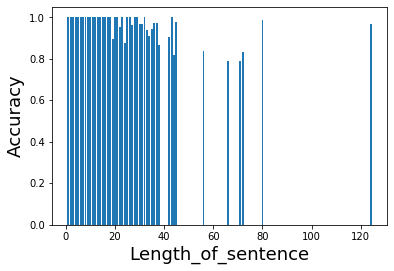

In [97]:
plt.bar(sentence.Length_of_sentence,sentence.Accuracy)
plt.xlabel('Length_of_sentence',size=18)
plt.ylabel('Accuracy',size=18)
plt.savefig('accuracy_length.png',dpi=200)
# plt.legend(fontsize=15)

Total wrong preidction 428


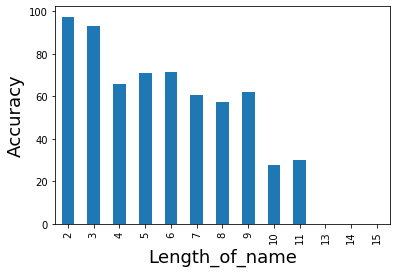

In [300]:
table =check_second_assumption_1(error) 
table['Accuracy/%'].plot(kind='bar')
plt.xlabel('Length_of_name',size=18)
plt.ylabel('Accuracy',size=18)
plt.savefig('accuracy_name.png',dpi=200)

In [38]:
import matplotlib.pyplot as plt


In [34]:
print_confusion_matrix(error.Prediction.values, error.Golden.values)
# print_precision_recall_fscore(error.Prediction.values, error.Golden.values)

Predicted  B-LOC  B-MISC  B-ORG  B-PER  I-LOC  I-MISC  I-ORG  I-PER     O
Gold                                                                     
B-LOC        192       4     20      3      1       0      0      0    15
B-MISC         5      38      5      1      0       1      0      0     8
B-ORG          5       2     36      5      0       0      0      0    17
B-PER         12      10     33    279      0       0      0      0    67
I-LOC          0       1      0      0     33       0      2      0     8
I-MISC         0       3      1      1      1      26      1      0     4
I-ORG          0       0      5      0      1       0     15      0     4
I-PER          0       1      1      6      0       1      9    209    82
O             15      12     18      8      2       2     15     10  3313


In [285]:
final= pd.read_csv('/Users/hernando/Desktop/NLP/assignment3/interpret_lstm_output/lstm_output_all.tsv', delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8',header=None)
final.columns=['Word','Golden','Prediction']

final

,Word,Golden,Prediction
0,SOCCER,O,O
1,-,O,O
2,JAPAN,B-LOC,O
3,GET,O,O
4,LUCKY,O,O
5,WIN,O,O
6,",",O,O
7,CHINA,B-PER,B-PER
8,IN,O,O
9,SURPRISE,O,O


In [91]:
final_error=final[final['Golden']!=final['Prediction']].dropna().reset_index()

In [92]:
zzz=[(final_error['Golden'][i],final_error['Prediction'][i]) for i in range(len(final_error['Prediction']))]
cs.Counter(zzz) 

In [93]:
cs.Counter(zzz) 

Counter({('B-LOC', 'O'): 155,
         ('B-PER', 'O'): 388,
         ('I-PER', 'B-PER'): 50,
         ('B-LOC', 'B-ORG'): 122,
         ('B-LOC', 'B-PER'): 36,
         ('B-MISC', 'O'): 142,
         ('B-PER', 'B-ORG'): 148,
         ('I-PER', 'I-ORG'): 66,
         ('O', 'B-MISC'): 211,
         ('I-PER', 'O'): 330,
         ('B-MISC', 'B-LOC'): 31,
         ('B-MISC', 'B-ORG'): 51,
         ('I-PER', 'B-MISC'): 6,
         ('O', 'B-ORG'): 396,
         ('O', 'B-LOC'): 183,
         ('B-ORG', 'B-MISC'): 79,
         ('B-PER', 'B-LOC'): 70,
         ('B-PER', 'B-MISC'): 44,
         ('I-MISC', 'B-MISC'): 14,
         ('O', 'I-ORG'): 152,
         ('O', 'I-PER'): 56,
         ('O', 'B-PER'): 138,
         ('I-MISC', 'O'): 44,
         ('I-MISC', 'B-ORG'): 6,
         ('B-ORG', 'O'): 344,
         ('O', 'I-MISC'): 82,
         ('B-ORG', 'B-LOC'): 142,
         ('I-ORG', 'O'): 120,
         ('B-ORG', 'B-PER'): 54,
         ('I-ORG', 'B-ORG'): 36,
         ('I-ORG', 'I-LOC'): 32,
         

In [94]:
finalsentence = check_first_assumption(final)

In [95]:
final_result=finalsentence.groupby(['Length_of_sentence']).agg({'Accuracy':'mean'})

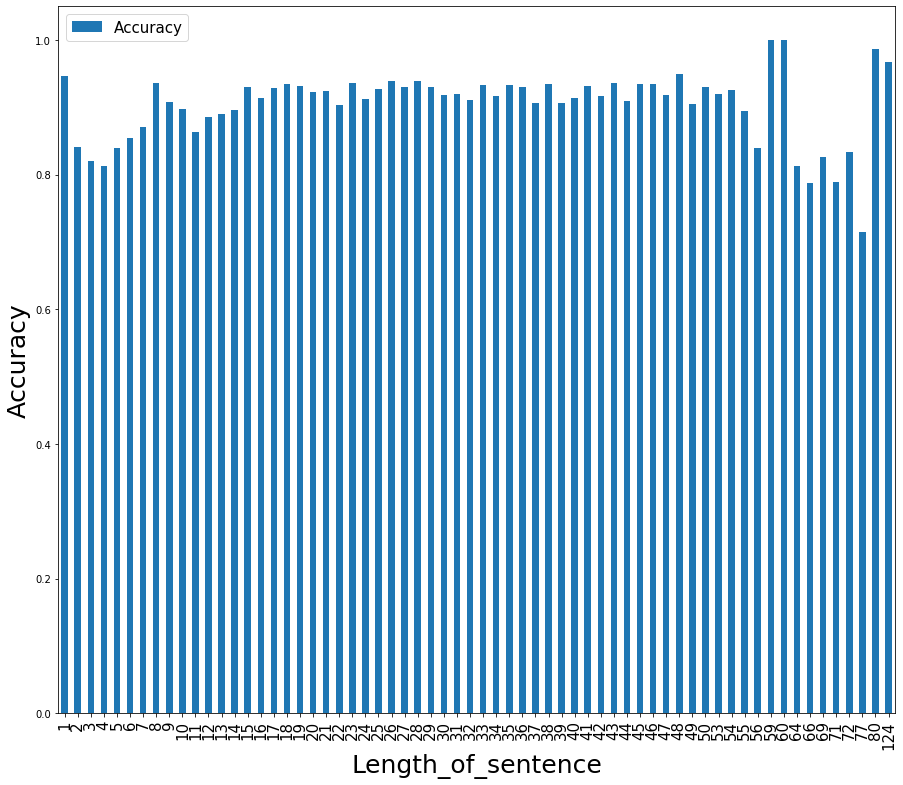

In [104]:
final_result.plot(kind='bar',figsize=(15,13))
plt.xlabel('Length_of_sentence',size=25)
plt.ylabel('Accuracy',size=25)
plt.legend(fontsize=15)
plt.xticks(size=15,rotation=90)
plt.savefig('accuracy_length_1.png',dpi=200)

In [105]:
def check_second_assumption(error):
    
    name_error =  error[error['Golden']!=error['Prediction']].dropna().reset_index(drop=True)
    print('Total wrong preidction',len(name_error['Golden']))
    
    wrong_name_prediction = name_error[(name_error['Golden']=='B-PER')|(name_error['Golden']=='I-PER')]
    
    print('Total wrong name preidction',len(wrong_name_prediction['Golden']))
    print('Wrong name prediction percentage',len(wrong_name_prediction['Golden'])*100/len(name_error['Golden']))
    wrong = 0
    for i in wrong_name_prediction.Word.values:
        if len(i)>5:
            wrong+=1
            
    print('Wrong 5 name prediction',wrong, wrong*100/len(wrong_name_prediction['Golden']))
            
        
        
    

#     number_of_word = 0
#     number_of_wrong = 0
#     number_of_right = 0
#     for i in range(len(error)):
#         if error['Word'][i] != '----------':
# #             number_of_word_list.append(number_of_word)
# #             number_of_right_list.append(number_of_right)
#             number_of_word += 1
# #         else:
# #             number_of_word +=1
#         if error['Golden'][i] == 'B-PER' and error['Prediction'][i] != 'B-PER':
#             number_of_wrong+=1
#         if error['Golden'][i] == 'I-PER' and error['Prediction'][i] != 'I-PER':
#             number_of_wrong+=1
#         if error['Golden'][i] ==  error['Prediction'][i]:
#             number_of_right+=1
#     sentence=pd.DataFrame(columns=['Length_of_sentence','Correct_prediction','Accuracy'])
#     sentence['Length_of_sentence'] = number_of_word_list
#     sentence['Correct_prediction'] = number_of_right_list
#     sentence['Accuracy'] = sentence['Correct_prediction']/sentence['Length_of_sentence']  
    return 
            

In [106]:
check_second_assumption(final)

Total wrong preidction 4167
Total wrong name preidction 1184
Wrong name prediction percentage 28.413726901847852
Wrong 5 name prediction 693 58.5304054054054


Total wrong preidction 4167


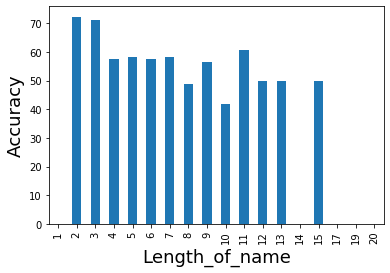

In [301]:
def check_second_assumption_1(error):
    namewrong = error[(error['Golden']=='B-PER')|(error['Golden']=='I-PER')]
    length_name_error=[]
    for i in namewrong.Word.values:
        length_name_error.append(len(i))
    table = pd.value_counts(length_name_error).rename_axis('Label').reset_index(name='counts')
    table.index = table['Label']
    table.drop('Label',axis=1,inplace=True)

    
    name_error =  error[error['Golden']!=error['Prediction']].dropna().reset_index(drop=True)
    print('Total wrong preidction',len(name_error['Golden']))
    wrong_length_name_error=[]
    wrong_name_prediction = name_error[(name_error['Golden']=='B-PER')|(name_error['Golden']=='I-PER')]
    
#     print('Total wrong name preidction',len(wrong_name_prediction['Golden']))
#     print('Wrong name prediction percentage',len(wrong_name_prediction['Golden'])*100/len(name_error['Golden']))
#     wrong = 0
    for i in wrong_name_prediction.Word.values:
        wrong_length_name_error.append(len(i))
    table1 = pd.value_counts(wrong_length_name_error).rename_axis('Label').reset_index(name='counts')
    table1.index = table1['Label']
    table1.drop('Label',axis=1,inplace=True)
    
    table['correct']=table1['counts']
    table['Accuracy/%']=np.round((table['counts'].values-table['correct'].values)*100/table['counts'].values,2)
    table=table.sort_index()
    return table
        
            
#     print('Wrong 5 name prediction',wrong, wrong*100/len(wrong_name_prediction['Golden']))

table =check_second_assumption_1(final) 
table['Accuracy/%'].plot(kind='bar')
plt.xlabel('Length_of_name',size=18)
plt.ylabel('Accuracy',size=18)
plt.savefig('accuracy_name2.png',dpi=200)

# adversarial set

In [33]:
final= pd.read_csv('/Users/hernando/Desktop/NLP/assignment3/interpret_lstm_output/lstm_output_all.tsv', delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8',header=None)
final.columns=['Word','Golden','Prediction']
final_name =final[(final['Golden']=='B-PER')|(final['Golden']=='I-PER')]

In [34]:
list_name=[]
for i in final_name.Word.values:
    if len(i)<=7:
        list_name.append(i)

In [35]:
import random
random.choices(list_name)[0]

'Voeks'

In [36]:
adversarial_example = final.copy()

In [37]:
for i in range(len(adversarial_example)):
    if adversarial_example['Golden'][i]=='B-PER' or adversarial_example['Golden'][i]=='I-PER':
        if len(adversarial_example['Word'][i])>7:
            adversarial_example['Word'][i] = random.choices(list_name)[0]
            

In [38]:
adversarial_example[(adversarial_example['Golden']=='B-PER')|(adversarial_example['Golden']=='I-PER')]

,Word,Golden,Prediction
7,CHINA,B-PER,B-PER
13,Nadim,B-PER,O
14,Ladki,I-PER,B-PER
93,Igor,B-PER,B-ORG
94,Awad,I-PER,I-ORG
118,Oleg,B-PER,O
119,Lee,I-PER,O
208,Takuya,B-PER,O
209,Takagi,I-PER,O
222,Bitar,B-PER,O


In [39]:
final[(final['Golden']=='B-PER')|(final['Golden']=='I-PER')]

,Word,Golden,Prediction
7,CHINA,B-PER,B-PER
13,Nadim,B-PER,O
14,Ladki,I-PER,B-PER
93,Igor,B-PER,B-ORG
94,Shkvyrin,I-PER,I-ORG
118,Oleg,B-PER,O
119,Shatskiku,I-PER,O
208,Takuya,B-PER,O
209,Takagi,I-PER,O
222,Hiroshige,B-PER,O


In [40]:
adversarial_example[["Word",'Golden']].to_csv("adversarial_example.csv", index=False)

# 3.4

In [11]:
trainset=pd.read_csv('/Users/hernando/Desktop/NLP/port/ExamData_Module_3/data/train/sentences.txt',sep='\t',header=None)
testset=pd.read_csv('/Users/hernando/Desktop/NLP/port/ExamData_Module_3/data/test/sentences.txt',sep='\t',header=None)
vailset=pd.read_csv('/Users/hernando/Desktop/NLP/port/ExamData_Module_3/data/val/sentences.txt',sep='\t',header=None)
trainset.columns=['sentence']
testset.columns=['sentence']
vailset.columns=['sentence']


In [12]:
print('length of tain,test,validation',len(trainset),len(testset),len(vailset))

length of tain,test,validation 33557 7194 7193


In [18]:
trainlabel=pd.read_csv('/Users/hernando/Desktop/NLP/port/ExamData_Module_3/data/train/labels.txt',sep='\t',header=None)
trainlabel.columns=['label']

In [28]:
label_test=[]
for i in range(len(trainlabel['label'])):
    label_test = label_test+str.split(trainlabel['label'][i],' ')

In [33]:
table =pd.DataFrame(columns=['label'])
table['label']=label_test

In [46]:
number =table['label'].value_counts().rename_axis('Label').reset_index(name='counts')

In [48]:
number.index=number['Label']
number.drop('Label',axis=1,inplace=True)

In [50]:
number.T

Label,O,B-geo,B-tim,B-org,I-per,B-per,I-org,B-gpe,I-geo,I-tim,B-art,B-eve,I-art,I-eve,B-nat,I-gpe,I-nat
counts,621876,26343,14219,13950,12220,11980,11540,11103,5236,4632,299,240,232,185,137,137,35


In [51]:
trainset['sentence'][0]

'Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .'

In [53]:
voc_test=[]
for i in range(len(trainset['sentence'])):
    voc_test = voc_test+str.split(trainset['sentence'][i],' ')

In [54]:
len(voc_test)

734351

In [63]:
voc_test_1=[]
for i in range(len(testset['sentence'])):
    voc_test_1 = voc_test_1+str.split(testset['sentence'][i],' ')
len(voc_test_1)

156234

In [65]:
voc_test_2=[]
for i in range(len(vailset['sentence'])):
    voc_test_2 = voc_test_2+str.split(vailset['sentence'][i],' ')
len(voc_test_2)

157968

In [69]:
word=pd.read_csv('/Users/hernando/Desktop/NLP/port/ExamData_Module_3/data/words.txt',sep='\t ',header=None)

In [71]:
len(word)

35180

# Model

In [9]:
import pandas as pd
forzen = pd.read_csv('/Users/hernando/Desktop/NLP/port/ExamData_Module_3/results/confusionmatrix_frozenEmbeddings.csv',sep=',')

fine = pd.read_csv('/Users/hernando/Desktop/NLP/port/ExamData_Module_3/results/confusionmatrix_tunedEmbeddings.csv',sep=',')

forzen.index=forzen['Gold']
fine.index=fine['Gold']
forzen.drop('Gold',axis=1,inplace=True)
fine.drop('Gold',axis=1,inplace=True)


In [10]:
forzen

,B-art,B-eve,B-geo,B-gpe,B-nat,B-org,B-per,B-tim,I-art,I-eve,I-geo,I-gpe,I-nat,I-org,I-per,I-tim,O
Gold,,,,,,,,,,,,,,,,,
B-art,0,0,13,0,0,10,1,1,0,0,0,0,0,2,1,0,38
B-eve,0,10,2,3,0,5,2,0,0,0,0,0,0,1,0,1,13
B-geo,0,0,4539,46,1,266,58,30,0,0,67,0,0,18,25,6,511
B-gpe,0,0,65,2307,0,20,5,3,0,0,4,0,0,4,0,0,84
B-nat,0,0,6,0,3,1,1,1,0,0,0,0,4,0,0,1,16
B-org,0,0,543,38,0,1599,102,7,0,1,12,0,0,47,50,5,654
B-per,0,0,70,10,0,104,1539,3,0,0,5,0,0,38,109,4,596
B-tim,0,0,72,0,0,22,2,2418,0,0,1,0,0,3,1,40,546
I-art,0,0,0,0,0,0,0,1,0,0,3,0,0,12,2,0,17


In [11]:
fine

,B-art,B-eve,B-geo,B-gpe,B-nat,B-org,B-per,B-tim,I-art,I-eve,I-geo,I-gpe,I-nat,I-org,I-per,I-tim,O
Gold,,,,,,,,,,,,,,,,,
B-art,4,0,18,1,0,11,4,0,0,0,0,0,0,3,0,0,25
B-eve,0,10,3,2,0,6,1,0,0,0,0,0,0,1,0,1,13
B-geo,2,0,4951,41,1,215,62,10,0,0,65,0,0,18,17,1,184
B-gpe,0,0,80,2379,0,10,3,0,0,0,4,0,0,3,1,1,11
B-nat,0,0,3,0,12,5,1,0,0,0,0,0,2,0,0,1,9
B-org,1,2,616,36,0,1785,122,12,0,3,11,0,0,36,40,1,393
B-per,0,0,93,5,1,117,1873,7,0,0,6,0,0,22,97,3,254
B-tim,0,1,67,0,0,19,6,2534,0,0,1,0,0,0,0,30,447
I-art,0,0,0,0,0,0,1,1,1,1,10,0,0,11,1,1,8


In [124]:
np.diag(forzen)-np.diag(fine)

array([  -4,    0, -412,  -72,   -9, -186, -334, -116,   -1,   -2,  -69,
        -11,   -1, -194, -176,  -57, -343])

In [115]:
accuracy = np.diag(forzen).sum()/forzen.sum().sum()
print('Percentage, Correct, Total',accuracy,np.diag(forzen).sum(),forzen.sum().sum())

Percentage, Correct, Total 0.945863256397455 147776 156234


In [118]:
accuracy = np.diag(fine).sum()/fine.sum().sum()
print('Percentage, Correct, Total',accuracy,np.diag(fine).sum(),fine.sum().sum())

Percentage, Correct, Total 0.958581358731134 149763 156234


In [26]:
def golden(label,matrix):
    k=[]
    for i in range(len(matrix)):
        k=k+[label[i]]*(matrix[:,i].sum())
    return k

def predict(label,matrix):
    k=[]
    for i in range(len(matrix)):
        for z in range(len(matrix)):
            k=k+[label[z]]*(matrix[:,i][z])
    return k

prediction=golden(forzen.index,forzen.as_matrix())
golden_matrix=predict(forzen.index,forzen.as_matrix())
print_confusion_matrix(prediction, golden_matrix)
print_precision_recall_fscore(prediction, golden_matrix)

Predicted  B-eve  B-geo  B-gpe  B-nat  B-org  B-per  B-tim  I-eve  I-geo  \
Gold                                                                       
B-art          0     13      0      0     10      1      1      0      0   
B-eve         10      2      3      0      5      2      0      0      0   
B-geo          0   4539     46      1    266     58     30      0     67   
B-gpe          0     65   2307      0     20      5      3      0      4   
B-nat          0      6      0      3      1      1      1      0      0   
B-org          0    543     38      0   1599    102      7      1     12   
B-per          0     70     10      0    104   1539      3      0      5   
B-tim          0     72      0      0     22      2   2418      0      1   
I-art          0      0      0      0      0      0      1      0      3   
I-eve          1      0      0      0      2      0      3      4      1   
I-geo          0     39      4      0      6      2      1      0    790   
I-gpe       

In [28]:
len(golden_matrix)

156234

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(golden_matrix,prediction,)

0.945863256397455

In [29]:
oo_1=['O']*len(prediction)

In [30]:
accuracy_score(golden_matrix,oo_1,)

0.8459938297681683

In [21]:
print_confusion_matrix(oo_1, golden_matrix)
print_precision_recall_fscore(oo_1, golden_matrix)

Predicted       O
Gold             
B-art          66
B-eve          37
B-geo        5567
B-gpe        2492
B-nat          33
B-org        3058
B-per        2478
B-tim        3105
I-art          35
I-eve          33
I-geo        1022
I-gpe          38
I-nat          10
I-org        2579
I-per        2521
I-tim         987
O          132173
P: 0.04976434292753931 R: 0.058823529411764705 F1: 0.05391604470724481


In [32]:
prediction=golden(fine.index,fine.as_matrix())
golden_matrix=predict(fine.index,fine.as_matrix())
oo_2=['O']*len(prediction)
print_confusion_matrix(oo_2, golden_matrix)
print_precision_recall_fscore(oo_2, golden_matrix)
print_confusion_matrix(prediction, golden_matrix)
print_precision_recall_fscore(prediction, golden_matrix)

Predicted       O
Gold             
B-art          66
B-eve          37
B-geo        5567
B-gpe        2492
B-nat          33
B-org        3058
B-per        2478
B-tim        3105
I-art          35
I-eve          33
I-geo        1022
I-gpe          38
I-nat          10
I-org        2579
I-per        2521
I-tim         987
O          132173
P: 0.04976434292753931 R: 0.058823529411764705 F1: 0.05391604470724481
Predicted  B-art  B-eve  B-geo  B-gpe  B-nat  B-org  B-per  B-tim  I-art  \
Gold                                                                       
B-art          4      0     18      1      0     11      4      0      0   
B-eve          0     10      3      2      0      6      1      0      0   
B-geo          2      0   4951     41      1    215     62     10      0   
B-gpe          0      0     80   2379      0     10      3      0      0   
B-nat          0      0      3      0     12      5      1      0      0   
B-org          1      2    616     36      0   1785    

In [120]:
golden_list=[]
for i in golden_matrix:
    if i == 'O':
        golden_list.append(i)
    else:
        golden_list.append('Other')
        
pre_list=[]
for i in prediction:
    if i == 'O':
        pre_list.append(i)
    else:
        pre_list.append('Other')  
print_confusion_matrix(pre_list, golden_list)

Predicted       O  Other
Gold                    
O          130747   1426
Other        2026  22035


# 3.4.4

In [148]:
goldnumber=fine.sum(axis=1).rename_axis('Label').reset_index(name='counts')

In [149]:
goldnumber['correct']=np.diag(fine)
goldnumber['Accuracy/%'] =np.round(goldnumber['correct'].values*100/goldnumber['counts'].values,2)

In [150]:
goldnumber.index=goldnumber['Label']
goldnumber.drop('Label',axis=1,inplace=True)

In [168]:
# Tgoldnumber=goldnumber.T
cnumber=[]
ccorrect=[]
for i in range(len(goldnumber)):
    cnumber.append(goldnumber['counts'][i]+goldnumber['counts'][i+8])
    ccorrect.append(goldnumber['correct'][i]+goldnumber['correct'][i+8])
    if i==7:
        break
    
    
    
    

In [176]:
catogery= pd.DataFrame(index=['art','eve','geo','gpe','nat','org','per','tim'])
catogery['counts']=cnumber
catogery['correct']=ccorrect
catogery['Accuracy/%'] =np.round(catogery['correct'].values*100/catogery['counts'].values,2)

In [185]:
tcatogery=catogery.T
tcatogery['O']=goldnumber.T['O']

In [188]:
goldnumber

,counts,correct,Accuracy/%
Label,,,
B-art,66,4,6.06
B-eve,37,10,27.03
B-geo,5567,4951,88.93
B-gpe,2492,2379,95.47
B-nat,33,12,36.36
B-org,3058,1785,58.37
B-per,2478,1873,75.59
B-tim,3105,2534,81.61
I-art,35,1,2.86


In [186]:
tcatogery

,art,eve,geo,gpe,nat,org,per,tim,O
counts,101.00,70.00,6589.00,2530.00,43.00,5637.00,4999.00,4092.00,132173.00
correct,5.00,16.00,5810.00,2404.00,13.00,3580.00,4011.00,3177.00,130747.00
Accuracy/%,4.95,22.86,88.18,95.02,30.23,63.51,80.24,77.64,98.92


In [178]:
from sklearn.metrics import classification_report

In [183]:
print(classification_report(y_pred=prediction, y_true=golden_matrix,labels=goldnumber.index))

              precision    recall  f1-score   support

       B-art       0.50      0.06      0.11        66
       B-eve       0.56      0.27      0.36        37
       B-geo       0.80      0.89      0.84      5567
       B-gpe       0.95      0.95      0.95      2492
       B-nat       0.57      0.36      0.44        33
       B-org       0.70      0.58      0.63      3058
       B-per       0.76      0.76      0.76      2478
       B-tim       0.88      0.82      0.85      3105
       I-art       0.50      0.03      0.05        35
       I-eve       0.26      0.18      0.21        33
       I-geo       0.69      0.84      0.76      1022
       I-gpe       1.00      0.66      0.79        38
       I-nat       0.14      0.10      0.12        10
       I-org       0.81      0.70      0.75      2579
       I-per       0.86      0.85      0.85      2521
       I-tim       0.80      0.65      0.72       987
           O       0.98      0.99      0.99    132173

    accuracy              

# 3.5

In [302]:
finalerror = pd.read_csv('/Users/hernando/Desktop/NLP/port/ExamData_Module_3/results/lstm_output_10percent.tsv',delimiter="\t",header=None,quoting=csv.QUOTE_NONE,)
finalerror.columns=['Word','Golden','Prediction']

In [194]:
import matplotlib.pyplot as plt
def check_first_assumption(error):
    


    number_of_word_list=[]
    number_of_right_list=[]
    number_of_word = 0
    number_of_right = 0
    for i in range(len(error)):
        if error['Word'][i] == '----------':
            number_of_word_list.append(number_of_word)
            number_of_right_list.append(number_of_right)
            number_of_word = 0
            number_of_right = 0
        else:
            number_of_word +=1
            if error['Golden'][i]==error['Prediction'][i]:
                number_of_right+=1
    sentence=pd.DataFrame(columns=['Length_of_sentence','Correct_prediction','Accuracy'])
    sentence['Length_of_sentence'] = number_of_word_list
    sentence['Correct_prediction'] = number_of_right_list
    sentence['Accuracy'] = sentence['Correct_prediction']/sentence['Length_of_sentence']  
    return sentence
            
sentence=check_first_assumption(finalerror)  

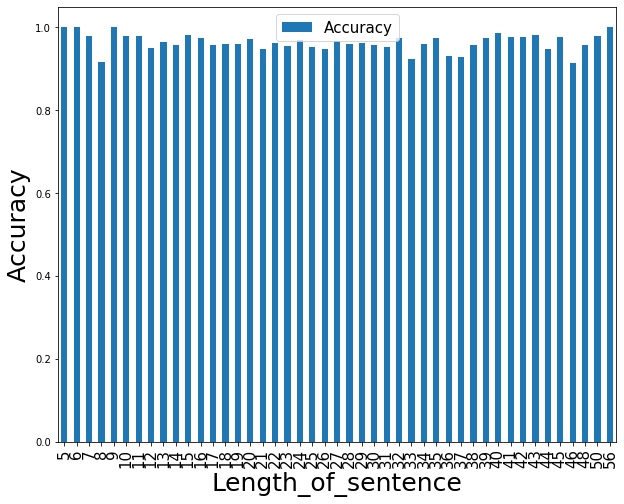

In [200]:
checkfirst=sentence.groupby(['Length_of_sentence']).agg({'Accuracy':'mean'})
checkfirst.plot(kind='bar',figsize=(10,8))
plt.xlabel('Length_of_sentence',size=25)
plt.ylabel('Accuracy',size=25)
plt.legend(fontsize=15)
plt.xticks(size=15,rotation=90)
plt.savefig('accuracy_length_2.png',dpi=200)

# Check name

In [206]:
finaldifference = finalerror[finalerror['Golden']!=finalerror['Prediction']].dropna().reset_index(drop=True)
finaldifference = finaldifference.reset_index(drop=True)
# finaldifference[(finaldifference['Golden']=='B-per')|(finaldifference['Golden']=='I-PER')]

In [ ]:
finaldifference = finalerror[finalerror['Golden']!=finalerror['Prediction']].dropna().reset_index(drop=True)
finaldifference = finaldifference.reset_index(drop=True)
finaldifference[(finaldifference['Golden']=='B-PER')|(finaldifference['Golden']=='I-PER')]

name_list = error[(error['Golden']=='B-PER')|(error['Golden']=='I-PER')]
ori_length_name=[]
for i in name_list.Word.values:
    ori_length_name.append(len(i))

In [220]:
def check_second_assumption(error):
    
    name_error =  error[error['Golden']!=error['Prediction']].dropna().reset_index(drop=True)
    print('Total wrong preidction',len(name_error['Golden']))
    
    wrong_name_prediction = name_error[(name_error['Golden']=='B-per')|(name_error['Golden']=='I-per')]
    
    print('Total wrong name preidction',len(wrong_name_prediction['Golden']))
    print('Wrong name prediction percentage',len(wrong_name_prediction['Golden'])*100/len(name_error['Golden']))
    wrong = 0
    for i in wrong_name_prediction.Word.values:
        if len(i)>5:
            wrong+=1
            
    print('Wrong 5 name prediction',wrong, wrong*100/len(wrong_name_prediction['Golden']))
            
check_second_assumption(finalerror)        

Total wrong preidction 618
Total wrong name preidction 79
Wrong name prediction percentage 12.783171521035598
Wrong 5 name prediction 49 62.0253164556962


Total wrong preidction 618


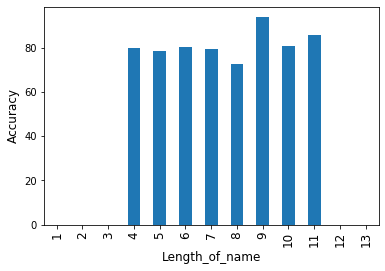

In [328]:
table =check_second_assumption(finalerror) 
table['Accuracy/%'].plot(kind='bar')
plt.xlabel('Length_of_name',size=12)
plt.ylabel('Accuracy',size=12)
plt.xticks(size=12,rotation=90)
plt.savefig('accuracy_name_3.png')


Total wrong preidction 618


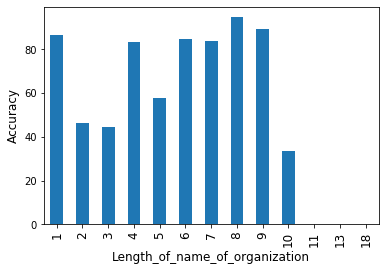

In [329]:
def check_fourth_assumption(error):
    namewrong = error[(error['Golden']=='B-tim')|(error['Golden']=='I-tim')]
    length_name_error=[]
    for i in namewrong.Word.values:
        length_name_error.append(len(i))
    table = pd.value_counts(length_name_error).rename_axis('Label').reset_index(name='counts')
    table.index = table['Label']
    table.drop('Label',axis=1,inplace=True)

    
    name_error =  error[error['Golden']!=error['Prediction']].dropna().reset_index(drop=True)
    print('Total wrong preidction',len(name_error['Golden']))
    wrong_length_name_error=[]
    wrong_name_prediction = name_error[(name_error['Golden']=='B-tim')|(name_error['Golden']=='I-tim')]
    
#     print('Total wrong name preidction',len(wrong_name_prediction['Golden']))
#     print('Wrong name prediction percentage',len(wrong_name_prediction['Golden'])*100/len(name_error['Golden']))
#     wrong = 0
    for i in wrong_name_prediction.Word.values:
        wrong_length_name_error.append(len(i))
    table1 = pd.value_counts(wrong_length_name_error).rename_axis('Label').reset_index(name='counts')
    table1.index = table1['Label']
    table1.drop('Label',axis=1,inplace=True)
    
    table['correct']=table1['counts']
    table['Accuracy/%']=np.round((table['counts'].values-table['correct'].values)*100/table['counts'].values,2)
    table=table.sort_index()
    return table
        
            
#     print('Wrong 5 name prediction',wrong, wrong*100/len(wrong_name_prediction['Golden']))

table =check_fourth_assumption(finalerror)
table['Accuracy/%'].plot(kind='bar')
plt.xlabel('Length_of_name_of_organization',size=12)
plt.ylabel('Accuracy',size=12)
plt.xticks(size=12,rotation=90)
plt.savefig('accuracy_ori_3.png')

Total wrong preidction 6471


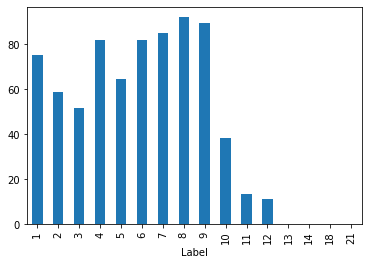

In [324]:
table =check_fourth_assumption(finaltotal)
table['Accuracy/%'].plot(kind='bar')

# check three

In [209]:
zzz=[(finaldifference['Golden'][i],finaldifference['Prediction'][i]) for i in range(len(finaldifference['Prediction']))]
hhh=cs.Counter(zzz) 
hhh.most_common()

[(('B-org', 'B-geo'), 67),
 (('B-tim', 'O'), 49),
 (('B-org', 'O'), 40),
 (('I-org', 'O'), 32),
 (('O', 'B-tim'), 30),
 (('I-tim', 'O'), 23),
 (('O', 'B-geo'), 23),
 (('B-per', 'O'), 23),
 (('O', 'B-per'), 22),
 (('O', 'B-org'), 21),
 (('B-geo', 'B-org'), 20),
 (('B-per', 'I-per'), 18),
 (('B-geo', 'O'), 16),
 (('B-org', 'B-per'), 13),
 (('I-org', 'I-geo'), 13),
 (('O', 'I-org'), 13),
 (('I-org', 'I-per'), 12),
 (('O', 'I-tim'), 11),
 (('I-tim', 'B-tim'), 11),
 (('I-per', 'O'), 9),
 (('I-per', 'I-org'), 8),
 (('I-org', 'B-org'), 7),
 (('I-geo', 'I-org'), 7),
 (('B-per', 'B-org'), 6),
 (('O', 'I-per'), 6),
 (('B-gpe', 'B-geo'), 5),
 (('I-per', 'B-per'), 5),
 (('B-geo', 'B-per'), 5),
 (('B-geo', 'B-gpe'), 5),
 (('I-org', 'B-geo'), 4),
 (('I-org', 'B-per'), 4),
 (('B-tim', 'B-geo'), 4),
 (('B-org', 'B-gpe'), 4),
 (('B-per', 'B-geo'), 4),
 (('B-geo', 'I-geo'), 4),
 (('B-tim', 'B-org'), 4),
 (('B-tim', 'I-tim'), 4),
 (('B-art', 'O'), 3),
 (('B-nat', 'O'), 3),
 (('B-nat', 'B-org'), 3),
 (('I

In [226]:
def check_second_assumption(error):
    
    name_error =  error[error['Golden']!=error['Prediction']].dropna().reset_index(drop=True)
    print('Total wrong preidction',len(name_error['Golden']))
    
    wrong_name_prediction = name_error[(name_error['Golden']=='B-org')|(name_error['Golden']=='I-org')]
    
    print('Total wrong name preidction',len(wrong_name_prediction['Golden']))
    print('Wrong name prediction percentage',len(wrong_name_prediction['Golden'])*100/len(name_error['Golden']))
    wrong = 0
    for i in wrong_name_prediction.Word.values:
        if len(i)>5:
            wrong+=1
            
    print('Wrong 5 name prediction',wrong, wrong*100/len(wrong_name_prediction['Golden']))
            
check_second_assumption(finalerror)

Total wrong preidction 618
Total wrong name preidction 202
Wrong name prediction percentage 32.68608414239482
Wrong 5 name prediction 111 54.95049504950495


Total wrong preidction 618


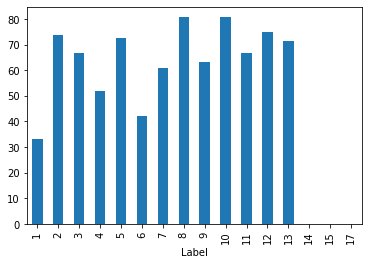

In [308]:
table =check_third_assumption(finalerror) 
table['Accuracy/%'].plot(kind='bar')

In [212]:
print(classification_report(y_pred=finalerror['Prediction'].dropna(), y_true=finalerror['Golden'].dropna(),labels=goldnumber.index))

              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00         8
       B-eve       0.00      0.00      0.00         3
       B-geo       0.80      0.89      0.84       494
       B-gpe       0.94      0.96      0.95       224
       B-nat       0.57      0.33      0.42        12
       B-org       0.72      0.57      0.64       302
       B-per       0.76      0.77      0.77       233
       B-tim       0.85      0.79      0.82       311
       I-art       0.00      0.00      0.00         4
       I-eve       0.00      0.00      0.00         5
       I-geo       0.73      0.84      0.78        75
       I-gpe       1.00      0.60      0.75         5
       I-nat       0.33      0.20      0.25         5
       I-org       0.85      0.73      0.78       269
       I-per       0.84      0.88      0.86       226
       I-tim       0.80      0.64      0.71        98
           O       0.98      0.99      0.99     13330

    accuracy              

In [221]:
namewrong = finaldifference[(finaldifference['Golden']=='B-org')|(finaldifference['Golden']=='I-org')]
length_name=[]
for i in namewrong.Word.values:
    length_name.append(len(i))

In [223]:
hhh=cs.Counter(length_name) 
hhh.most_common()

[(6, 41),
 (4, 37),
 (7, 36),
 (5, 26),
 (3, 15),
 (8, 13),
 (9, 11),
 (2, 11),
 (10, 5),
 (1, 2),
 (11, 2),
 (13, 2),
 (12, 1)]

In [228]:
namewrong = finalerror[(finalerror['Golden']=='B-org')|(finalerror['Golden']=='I-org')]
length_name_error=[]
for i in namewrong.Word.values:
    length_name_error.append(len(i))
hhh=cs.Counter(length_name_error) 
hhh.most_common()

[(5, 95),
 (7, 92),
 (4, 77),
 (6, 71),
 (8, 67),
 (3, 45),
 (2, 42),
 (9, 30),
 (10, 26),
 (13, 7),
 (11, 6),
 (17, 4),
 (12, 4),
 (1, 3),
 (15, 1),
 (14, 1)]

In [245]:
pd.value_counts(length_name_error).rename_axis('Label').reset_index(name='counts')

,Label,counts
0,5,95
1,7,92
2,4,77
3,6,71
4,8,67
5,3,45
6,2,42
7,9,30
8,10,26
9,13,7


# Verification

In [230]:
finaltotal = pd.read_csv('/Users/hernando/Desktop/NLP/port/ExamData_Module_3/results/lstm_output_all.tsv',delimiter="\t",header=None,quoting=csv.QUOTE_NONE,)
finaltotal.columns=['Word','Golden','Prediction']

In [316]:
def check_second_assumption(error):
    namewrong = error[(error['Golden']=='B-per')|(error['Golden']=='I-per')]
    length_name_error=[]
    for i in namewrong.Word.values:
        length_name_error.append(len(i))
    table = pd.value_counts(length_name_error).rename_axis('Label').reset_index(name='counts')
    table.index = table['Label']
    table.drop('Label',axis=1,inplace=True)

    
    name_error =  error[error['Golden']!=error['Prediction']].dropna().reset_index(drop=True)
    print('Total wrong preidction',len(name_error['Golden']))
    wrong_length_name_error=[]
    wrong_name_prediction = name_error[(name_error['Golden']=='B-per')|(name_error['Golden']=='I-per')]
    
#     print('Total wrong name preidction',len(wrong_name_prediction['Golden']))
#     print('Wrong name prediction percentage',len(wrong_name_prediction['Golden'])*100/len(name_error['Golden']))
#     wrong = 0
    for i in wrong_name_prediction.Word.values:
        wrong_length_name_error.append(len(i))
    table1 = pd.value_counts(wrong_length_name_error).rename_axis('Label').reset_index(name='counts')
    table1.index = table1['Label']
    table1.drop('Label',axis=1,inplace=True)
    
    table['correct']=table1['counts']
    table['Accuracy/%']=np.round((table['counts'].values-table['correct'].values)*100/table['counts'].values,2)
    table=table.sort_index()
    return table
        
            
#     print('Wrong 5 name prediction',wrong, wrong*100/len(wrong_name_prediction['Golden']))

table =check_second_assumption(finaltotal) 

Total wrong preidction 6471


Total wrong preidction 6471


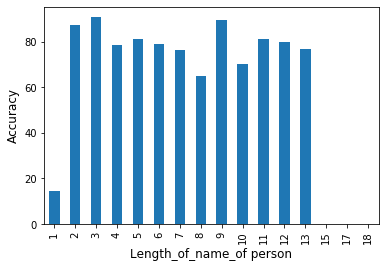

In [330]:
table =check_second_assumption(finaltotal) 
table['Accuracy/%'].plot(kind='bar')
plt.xlabel('Length_of_name_of person',size=12)
plt.ylabel('Accuracy',size=12)
plt.xticks(size=10,rotation=90)
plt.savefig('accuracy_name_4.png')

In [234]:
def check_third_assumption(error):
    
    name_error =  error[error['Golden']!=error['Prediction']].dropna().reset_index(drop=True)
    print('Total wrong preidction',len(name_error['Golden']))
    
    wrong_name_prediction = name_error[(name_error['Golden']=='B-org')|(name_error['Golden']=='I-org')]
    
    print('Total wrong name preidction',len(wrong_name_prediction['Golden']))
    print('Wrong name prediction percentage',len(wrong_name_prediction['Golden'])*100/len(name_error['Golden']))
    wrong = 0
    for i in wrong_name_prediction.Word.values:
        if len(i)>5:
            wrong+=1
            
    print('Wrong 5 name prediction',wrong, wrong*100/len(wrong_name_prediction['Golden']))

check_third_assumption(finaltotal) 

Total wrong preidction 6471
Total wrong name preidction 2057
Wrong name prediction percentage 31.787977128728173
Wrong 5 name prediction 1115 54.20515313563442


In [306]:
def check_third_assumption(error):
    namewrong = error[(error['Golden']=='B-org')|(error['Golden']=='I-org')]
    length_name_error=[]
    for i in namewrong.Word.values:
        length_name_error.append(len(i))
    table = pd.value_counts(length_name_error).rename_axis('Label').reset_index(name='counts')
    table.index = table['Label']
    table.drop('Label',axis=1,inplace=True)

    
    name_error =  error[error['Golden']!=error['Prediction']].dropna().reset_index(drop=True)
    print('Total wrong preidction',len(name_error['Golden']))
    wrong_length_name_error=[]
    wrong_name_prediction = name_error[(name_error['Golden']=='B-org')|(name_error['Golden']=='I-org')]
    
#     print('Total wrong name preidction',len(wrong_name_prediction['Golden']))
#     print('Wrong name prediction percentage',len(wrong_name_prediction['Golden'])*100/len(name_error['Golden']))
#     wrong = 0
    for i in wrong_name_prediction.Word.values:
        wrong_length_name_error.append(len(i))
    table1 = pd.value_counts(wrong_length_name_error).rename_axis('Label').reset_index(name='counts')
    table1.index = table1['Label']
    table1.drop('Label',axis=1,inplace=True)
    
    table['correct']=table1['counts']
    table['Accuracy/%']=np.round((table['counts'].values-table['correct'].values)*100/table['counts'].values,2)
    table=table.sort_index()
    return table

Total wrong preidction 6471


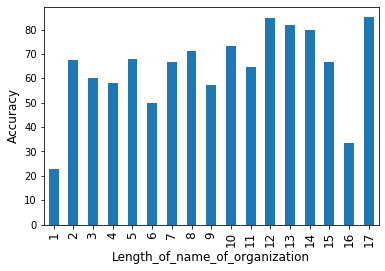

In [331]:
table=check_third_assumption(finaltotal)
table['Accuracy/%'].plot(kind='bar')
plt.xlabel('Length_of_name_of_organization',size=12)
plt.ylabel('Accuracy',size=12)
plt.xticks(size=12,rotation=90)
plt.savefig('accuracy_ori_4.png')

# Comparison

In [332]:
first=pd.read_csv('/Users/hernando/Desktop/NLP/assignment3/interpret_lstm_output/lstm_output_all.tsv', delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8',header=None)
first.columns=['Word','Golden','Prediction']

In [333]:
second = pd.read_csv('/Users/hernando/Desktop/NLP/port/ExamData_Module_3/results/lstm_output_all.tsv',delimiter="\t",header=None,quoting=csv.QUOTE_NONE,)
second.columns=['Word','Golden','Prediction']

In [343]:
difference1 = first[first['Golden']!= first['Prediction']].dropna().reset_index(drop=True)

difference2 = second[second['Golden']!=second['Prediction']].dropna().reset_index(drop=True)

differencelist1=[(difference1['Golden'][i],difference1['Prediction'][i])for i in range(len(difference1))]
differencelist2=[(difference2['Golden'][i],difference2['Prediction'][i])for i in range(len(difference2))]

# difference[(difference['Golden']=='B-PER')|(difference['Golden']=='I-PER')]

# name_list = error[(error['Golden']=='B-PER')|(error['Golden']=='I-PER')]
# ori_length_name=[]
# for i in name_list.Word.values:
#     ori_length_name.append(len(i))

In [347]:
kkk=cs.Counter(differencelist1)
kkk.most_common()[:5]

[(('O', 'B-ORG'), 396),
 (('B-PER', 'O'), 388),
 (('B-ORG', 'O'), 344),
 (('I-PER', 'O'), 330),
 (('O', 'B-MISC'), 211)]

In [348]:
zzz=cs.Counter(differencelist2)
zzz.most_common()[:5]

[(('B-org', 'B-geo'), 616),
 (('B-tim', 'O'), 447),
 (('B-org', 'O'), 393),
 (('I-org', 'O'), 323),
 (('O', 'B-org'), 306)]